In [1]:
import pandas as pd

In [2]:
screen_width_pix = 1920
screen_height_pix = 1080

In [3]:
subjects_to_include = "data/subject_files.txt"
resumes_to_include = "data/resume_names.txt"

In [4]:
subjects_data = []  # contains raw eye-tracking data for each subject
times_subjects = []  # list of dataframes. each dataframe contains times spent per block per resume for each subject
resumes = []   # resume names
subject_files = []


In [5]:
with open(subjects_to_include, 'r') as file:
    lines = file.readlines()
    for line in lines:
        subject_files.append(line.strip())
        
print(subject_files)

['data/subject-0.tsv']


In [6]:
with open(resumes_to_include, 'r') as file:
    lines = file.readlines()
    for line in lines:
        resumes.append(line.strip())
        
print(resumes)

['QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG', 'QUALIFIED_PIC_ GOODSORT_AISHA.PNG', 'QUALIFIED_NOPIC_BADSORT_DAVID.PNG', 'QUALIFIED_NOPIC_BADSORT_DAVID.PNG', 'UNQUALIFIED_PIC_BADSORT_TIAN.PNG', 'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG', 'QUALIFIED_PIC_BADSORT_RAHUL.PNG', 'QUALIFIED_PIC_GOODSORT_EMILIA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG', 'UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG', 'UNQUALIFIED_PIC_ BADSORT_LEILA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG', 'UNQUALIFIED_PIC_GOODSORT_KARE.PNG']


In [7]:
# pixel coordinates for areas of interest for each resume. coordinates correspond to 1920*1080 resolution

aoi = {
    "QUALIFIED_PIC_GOODSORT_EMILIA.PNG": {
        "name" : [(605,39), (980,245)],
        "picture" : [(995,39), (1314,245)],
        "experience" : [(605,245), (980,1040)],
        "languages" : [(995,245), (1314,385)],
        "education" : [(995,385), (1314,610)],
        "skills" : [(995,610), (1314,770)],
        "hobbies" : [(995,870), (1314,1040)],
        "soft_skills" : [(995,770), (1314,870)]
    },
    "QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG": {
        "name" : [(605,39), (952,243)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(937,405), (1314,1040)],
        "languages" : [(605,577), (937,745)],
        "soft_skills" : [(605,265), (937,402)],
        "skills" : [(605,405), (937,575)],
        "education" : [(605,745), (937,1040)],
        "hobbies" : [(937,265), (1314,402)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG": {
        "name" : [(605,39), (952,243)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,255), (943,797)],
        "languages" : [(950,607), (1040,870)],
        "soft_skills" : [(-1,-1), (-1,-1)],
        "skills" : [(950,423), (1040,605)],
        "education" : [(950,255), (1040,420)],
        "hobbies" : [(605,805), (944,980)]
    },
    "hans": {
        "name" : [(605,39), (959,258)],
        "picture" : [(958,39), (1314,258)],
        "experience" : [(605,405),(964,955)],
        "languages" : [(958,257),((1314,404))],
        "soft_skills" : [(958,551),(1314,712)],
        "skills" : [(958,404),(1314,547)],
        "education" : [(605,258),(961,404)],
        "hobbies" : [(958,713),(1314,900)]
    },
    "UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG": {
        "name" : [(605,39),(954,249)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(605,254),(954,885)],
        "languages" : [(954,559),(1314,728)],
        "soft_skills" : [(-1,-1),(-1,-1)],
        "skills" : [(954,405),(1314,554)],
        "education" : [(954,249),(1314,401)],
        "hobbies" : [(954,733),(1314,885)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG": {
        "name" : [(605,39),(945,250)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(945,250),(1314,738)],
        "languages" : [(605,734),(945,910)],
        "soft_skills" : [(605,415),(945,570)],
        "skills" : [(605,574),(945,730)],
        "education" : [(945,742),(1314,990)],
        "hobbies" : [(605,255),(945,410)]
    },
    "UNQUALIFIED_PIC_BADSORT_TIAN.PNG": {
        "name" : [(605,39),(930,250)],
        "picture" : [(930,39),(1314,248)],
        "experience" : [(930,252),(1314,740)],
        "languages" : [(605,423),(930,650)],
        "soft_skills" : [(605,809),(930,970)],
        "skills" : [(605,654),(930,805)],
        "education" : [(605,43),(930,419)],
        "hobbies" : [(930,744),(1314,890)]
    },
    "UNQUALIFIED_PIC_ BADSORT_LEILA.PNG": {
        "name" : [(605,39),(934,248)],
        "picture" : [(938,39),(1314,248)],
        "experience" : [(938,412),(1314,984)],
        "languages" : [(938,252),(1314,408)],
        "soft_skills" : [(605,386),(934,634)],
        "skills" : [(605,638),(934,736)],
        "education" : [(605,740),(934,945)],
        "hobbies" : [(605,252),(934,382)]
    },
    "QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG": {
        "name" : [(605,39),(995,240)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(915,245),(1314,965)],
        "languages" : [(605,499),(910,655)],
        "soft_skills" : [(605,829),(910,965)],
        "skills" : [(605,659),(910,825)],
        "education" : [(605,244),(910,495)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_ GOODSORT_AISHA.PNG": {
        "name" : [(605,39),(1015,259)],
        "picture" : [(1020,39),(1314,260)],
        "experience" : [(910,384),(1314,1040)],
        "languages" : [(605,581),(906,695)],
        "soft_skills" : [(605,264),(906,418)],
        "skills" : [(605,422),(906,577)],
        "education" : [(605,699),(906,1040)],
        "hobbies" : [(910,264),(1314,380)]
    },
    "QUALIFIED_PIC_BADSORT_RAHUL.PNG": {
        "name" : [(605,39),(946,232)],
        "picture" : [(950,39),(1314,240)],
        "experience" : [(605,236),(946,895)],
        "languages" : [(950,468),(1314,653)],
        "soft_skills" : [(950,808),(1314,956)],
        "skills" : [(950,657),(1314,804)],
        "education" : [(950,244),(1314,464)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_NOPIC_BADSORT_DAVID.PNG": {
        "name" : [(605,39),(930,238)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(930,242),(1314,995)],
        "languages" : [(605,863),(930,995)],
        "soft_skills" : [(605,242),(930,506)],
        "skills" : [(605,510),(930,673)],
        "education" : [(605,676),(930,860)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    #test resume
    "UNQUALIFIED_PIC_GOODSORT_KARE.PNG": {
        "name" : [(605,39),(930,238)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(930,242),(1314,995)],
        "languages" : [(605,863),(930,995)],
        "soft_skills" : [(605,242),(930,506)],
        "skills" : [(605,510),(930,673)],
        "education" : [(605,676),(930,860)],
        "hobbies" : [(-1,-1),(-1,-1)]
    }
}

In [8]:
for file in subject_files:
    df = pd.read_csv(file, sep='\t')
    
    #using only required fields
    df = df[['CNT', 'TIME', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD', 'FPOGID', 'FPOGV', 'USER']]
    subjects_data.append(df)


In [25]:
subjects_data[0].head()

IndexError: list index out of range

In [10]:
# list of resume names as displayed in the tsv file
#resumes = ['qualified_pic_goodSort_female .png', 'qualified_noPic_ goodSort_female.png', 'UNQUALIFIED_NOPIC_FEMALE_GOODORDER.PNG', 'UNQUALIFIED_PIC_MALE_GOODORDER.PNG']

In [11]:
# find indexes for splitting samples into separate dataframes for each resume
def find_indexes(resumes, df):
    indexes = []
    for resume in resumes:
        start_row = df[df['USER'] == resume + ' DISPLAYED']
        end_row = df[df['USER'] == resume + ' HIDDEN']
        if (len(start_row) == 0 or len(end_row)==0):
            continue
        start_index = start_row.index[0]
        end_index = end_row.index[0]
        indexes.append((start_index, end_index))
    return indexes

In [12]:
# grouping samples into fixations:
# eliminate non valid samples by keeping only those with FPOGV == 1
# group by fixation ID
# take fpogx and fpogy values of last sample in the fixation for fixation position. do the same for fixation duration

def group_samples_into_fixations(resume_dfs, fixations_df):
    for df in resume_dfs:
        df = df[df['FPOGV'] == 1]
        df = df.groupby('FPOGID').agg({
        'FPOGX' : 'last',
        'FPOGY' : 'last',
        'FPOGD' : 'last'
    }).reset_index()
        fixations_df.append(df)
    

In [13]:
for subject_data in subjects_data:
    
    # data structure to store amount of time spent fixation on each area for each resume

    times = {
        "QUALIFIED_PIC_GOODSORT_EMILIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "hans": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "UNQUALIFIED_PIC_BADSORT_TIAN.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "UNQUALIFIED_PIC_ BADSORT_LEILA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "QUALIFIED_PIC_ GOODSORT_AISHA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "QUALIFIED_PIC_BADSORT_RAHUL.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_DAVID.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        },
        # test resume
        "UNQUALIFIED_PIC_GOODSORT_KARE.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "total" : 0
        }
    }
    
    
    total_time_per_resume = []
    
    resume_fixations_df = []  # list of dataframes. contains fixations data for each resume.
    
    indexes = find_indexes(resumes, subject_data)
    
    #splitting samples into separate dataframes for each resume
    resume_dfs = []
    for i in range(len(indexes)):
        total_time = df.at[indexes[i][1],"TIME"] - df.at[indexes[i][0],"TIME"]
        total_time_per_resume.append(total_time)
        resume_dfs.append(df.loc[indexes[i][0] : indexes[i][1]])
        
    group_samples_into_fixations(resume_dfs, resume_fixations_df)
    
    
    # calculation for time spent fixating on each area in each resume

    for i in range(len(resume_dfs)):
        areas = aoi[resumes[i]]
        fixations = resume_fixations_df[i]
        for j in range(len(fixations)):
            fixation = fixations.loc[j]
            for area_name, area_coord in areas.items():
                x_pixel = fixation['FPOGX'] * screen_width_pix #1920
                y_pixel = fixation['FPOGY'] * screen_height_pix #1080
                area_start = area_coord[0]
                area_end = area_coord[1]
                times[resumes[i]]['total'] += fixation['FPOGD']
                if (x_pixel > area_start[0] and x_pixel < area_end[0] and
                    y_pixel > area_start[1] and y_pixel < area_end[1]):

                    times[resumes[i]][area_name] += (fixation['FPOGD'] * 100 / total_time_per_resume[i])
                    break
        
    
    times_subjects.append(times)

            
            

In [14]:
times_subjects

[{'QUALIFIED_PIC_GOODSORT_EMILIA.PNG': {'name': 0,
   'picture': 6.189455331488739,
   'experience': 26.477845877401727,
   'languages': 14.103293985784452,
   'education': 31.51631870624412,
   'skills': 7.3361680172924375,
   'hobbies': 5.177419785263568,
   'soft_skills': 6.906161879430745,
   'total': 49.611360000000005},
  'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG': {'name': 4.296035128815072,
   'picture': 0,
   'experience': 41.9268525338391,
   'languages': 14.322719826770914,
   'education': 8.725775486301504,
   'skills': 9.637643535903655,
   'hobbies': 7.295024893643612,
   'soft_skills': 10.15258173446518,
   'total': 51.60413000000001},
  'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG': {'name': 4.086643100326701,
   'picture': 0,
   'experience': 31.117137047170765,
   'languages': 3.2292965636744273,
   'education': 0,
   'skills': 33.33505069006298,
   'hobbies': 3.7427161293444113,
   'soft_skills': 0,
   'total': 63.295420000000036},
  'hans': {'name': 0,
   'picture': 0,
   'experi

In [15]:
def contains_picture(key):
    if 'NOPIC' in key:
        return False
    
    
    return True

In [16]:
resumes_with_pic = []
resumes_without_pic = []

In [17]:
for subject_resumes in times_subjects:
    resume_names = subject_resumes.keys()
    
    for resume_name in resume_names:
        if contains_picture(resume_name):
            resumes_with_pic.append(subject_resumes[resume_name])
        else:
            resumes_without_pic.append(subject_resumes[resume_name])


In [18]:
resumes_with_pic

[{'name': 0,
  'picture': 6.189455331488739,
  'experience': 26.477845877401727,
  'languages': 14.103293985784452,
  'education': 31.51631870624412,
  'skills': 7.3361680172924375,
  'hobbies': 5.177419785263568,
  'soft_skills': 6.906161879430745,
  'total': 49.611360000000005},
 {'name': 0,
  'picture': 0,
  'experience': 0,
  'languages': 0,
  'education': 0,
  'skills': 0,
  'hobbies': 0,
  'soft_skills': 0,
  'total': 0},
 {'name': 0,
  'picture': 0,
  'experience': 45.853970148697805,
  'languages': 23.537206884171592,
  'education': 28.801051929704016,
  'skills': 14.780731408215203,
  'hobbies': 0,
  'soft_skills': 0,
  'total': 55.97510999999995},
 {'name': 3.978682958071237,
  'picture': 0,
  'experience': 29.368826122110164,
  'languages': 7.331582223433444,
  'education': 28.444121246753685,
  'skills': 2.5234830200163367,
  'hobbies': 5.6829538694987445,
  'soft_skills': 8.05700631035829,
  'total': 144.03414000000015},
 {'name': 3.9709038456312706,
  'picture': 0,
  'exp

In [19]:
resumes_without_pic

[{'name': 4.296035128815072,
  'picture': 0,
  'experience': 41.9268525338391,
  'languages': 14.322719826770914,
  'education': 8.725775486301504,
  'skills': 9.637643535903655,
  'hobbies': 7.295024893643612,
  'soft_skills': 10.15258173446518,
  'total': 51.60413000000001},
 {'name': 4.086643100326701,
  'picture': 0,
  'experience': 31.117137047170765,
  'languages': 3.2292965636744273,
  'education': 0,
  'skills': 33.33505069006298,
  'hobbies': 3.7427161293444113,
  'soft_skills': 0,
  'total': 63.295420000000036},
 {'name': 9.821064867711591,
  'picture': 0,
  'experience': 25.71691620881498,
  'languages': 5.002213368747432,
  'education': 16.073693588075606,
  'skills': 25.71691620881498,
  'hobbies': 9.4598607509561,
  'soft_skills': 0,
  'total': 40.71626999999998},
 {'name': 5.521858660436038,
  'picture': 0,
  'experience': 33.642725532696204,
  'languages': 3.8121451806308855,
  'education': 2.756989149473398,
  'skills': 0,
  'hobbies': 18.921885307431594,
  'soft_skill

In [20]:
block_times_with_pic = {}
block_times_without_pic = {}

for resume in resumes_with_pic:
    for key, value in resume.items():
        if key in block_times_with_pic:
            block_times_with_pic[key] += value
        else:
            block_times_with_pic[key] = value
            
for resume in resumes_without_pic:
    for key, value in resume.items():
        if key in block_times_without_pic:
            block_times_without_pic[key] += value
        else:
            block_times_without_pic[key] = value

In [21]:
block_times_with_pic

{'name': 7.949586803702507,
 'picture': 6.189455331488739,
 'experience': 162.00553524719234,
 'languages': 53.42775679170337,
 'education': 136.14259881594862,
 'skills': 46.280618794203335,
 'hobbies': 31.84032918940186,
 'soft_skills': 28.85486866117042,
 'total': 432.69146000000006}

In [22]:
block_times_without_pic

{'name': 34.30228893436124,
 'picture': 0,
 'experience': 250.77460822944107,
 'languages': 67.07914514497355,
 'education': 63.23098268392452,
 'skills': 99.21266498319727,
 'hobbies': 39.41948708137572,
 'soft_skills': 67.01627436642812,
 'total': 423.58578}

In [23]:
blocks = []
relative_times = []
pictures = []

for key, value in block_times_with_pic.items():
    blocks.append(key)
    relative_times.append(value)
    pictures.append("Yes")  

for key, value in block_times_without_pic.items():
    blocks.append(key)
    relative_times.append(value)
    pictures.append("No")

df = pd.DataFrame({
    'block': blocks,
    'relative_time': relative_times,
    'picture': pictures
})

df = df[df['block'] != 'total']
#df['picture'] = df['picture'].astype(str)
print(df)

          block  relative_time picture
0          name       7.949587     Yes
1       picture       6.189455     Yes
2    experience     162.005535     Yes
3     languages      53.427757     Yes
4     education     136.142599     Yes
5        skills      46.280619     Yes
6       hobbies      31.840329     Yes
7   soft_skills      28.854869     Yes
9          name      34.302289      No
10      picture       0.000000      No
11   experience     250.774608      No
12    languages      67.079145      No
13    education      63.230983      No
14       skills      99.212665      No
15      hobbies      39.419487      No
16  soft_skills      67.016274      No


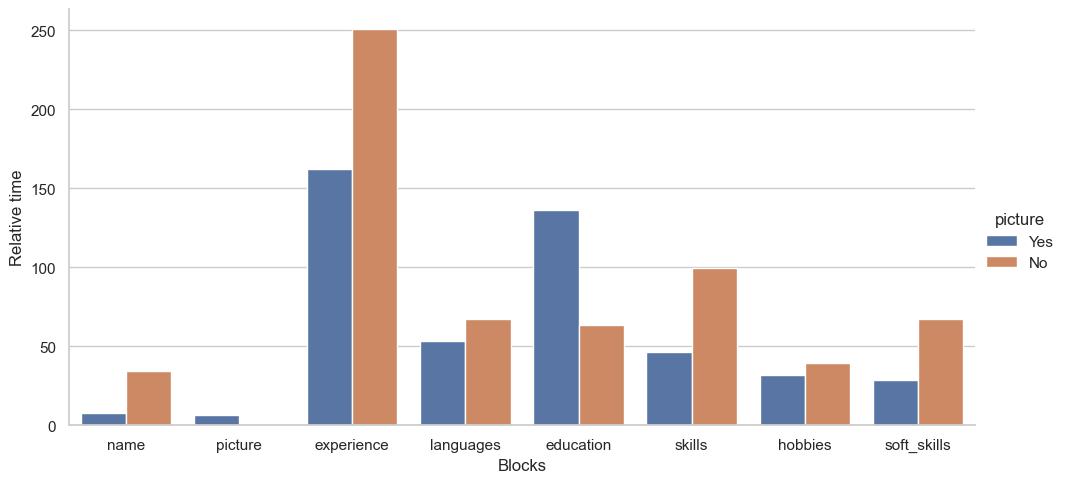

In [24]:
import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="block", y="relative_time", hue="picture", aspect = 2)
    
g.set_axis_labels("Blocks", "Relative time")
  